So here are some very first statistics as a check for the current status.
I did two recordings, one walking on pavement and car driving as a passanger, the other walking on rough terrain both containing HR/Cofidence from current (2v12) firmware and polar HR10 as a reference.

In [137]:
import matplotlib.pyplot as plt
import pandas as pd
import math

In [139]:
rec15 = pd.read_csv('recorder.log15.csv')
rec17 = pd.read_csv('recorder.log17.csv')

In [140]:
df = rec15.loc[1:,['Confidence', 'Heartrate', 'BT Heartrate']]
df['dHR'] = df.apply(lambda row: row['Heartrate'] - row['BT Heartrate'], axis=1)
df['ConfBin'] = df.apply(lambda row: math.floor(row['Confidence']/10)*10, axis=1)

In [141]:
df

Confidence  Heartrate  BT Heartrate   dHR  ConfBin
1             0        110          85.0  25.0        0
2             0         97          83.0  14.0        0
3            81         86          84.0   2.0       80
4            73         84          81.0   3.0       70
5            91         79          80.0  -1.0       90
..          ...        ...           ...   ...      ...
721          61         74         116.0 -42.0       60
722          66         84         109.0 -25.0       60
723           0        107          99.0   8.0        0
724           3         98          98.0   0.0        0
725           0        171          88.0  83.0        0

[725 rows x 5 columns]

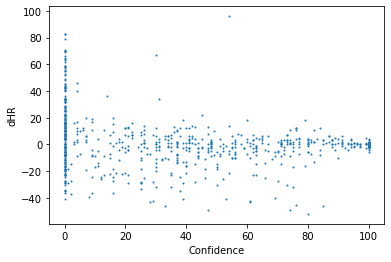

In [145]:
df.plot.scatter(x="Confidence", y="dHR", s=1);

In [142]:
bins = pd.DataFrame({})
bins['count'] = df.groupby("ConfBin")["dHR"].count()
sumcount = bins['count'].sum(); bins['percent'] = bins['count'].apply(lambda row: row/sumcount*100)
bins['mean'] = df.groupby("ConfBin")["dHR"].mean()
bins['std'] = df.groupby("ConfBin")["dHR"].std()
bins

count    percent       mean        std
ConfBin                                        
0          254  35.034483  10.185039  25.495431
10          34   4.689655  -6.970588  15.490927
20          47   6.482759  -5.234043  15.883014
30          67   9.241379  -3.761194  16.554858
40          62   8.551724  -2.725806  11.064890
50          40   5.517241  -3.600000  19.251107
60          41   5.655172  -5.975610  13.248562
70          50   6.896552  -3.420000  13.337212
80          39   5.379310  -1.641026  12.140596
90          36   4.965517   0.138889   2.779031
100         55   7.586207  -0.200000   1.659987

In [123]:
df = rec17.loc[1:,['Confidence', 'Heartrate', 'BT Heartrate']]
df['dHR'] = df.apply(lambda row: row['Heartrate'] - row['BT Heartrate'], axis=1)
df['ConfBin'] = df.apply(lambda row: math.floor(row['Confidence']/10)*10, axis=1)

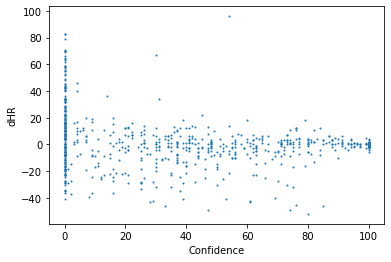

In [146]:
df.plot.scatter(x="Confidence", y="dHR", s=1);

In [124]:
bins = pd.DataFrame({})
bins['count'] = df.groupby("ConfBin")["dHR"].count()
sumcount = bins['count'].sum(); bins['percent'] = bins['count'].apply(lambda row: row/sumcount*100)
bins['mean'] = df.groupby("ConfBin")["dHR"].mean()
bins['std'] = df.groupby("ConfBin")["dHR"].std()
bins

count    percent       mean        std
ConfBin                                        
0          608  45.611403  12.100329  24.498290
10         101   7.576894  -3.475248  21.447421
20          69   5.176294  -4.869565  15.718959
30          97   7.276819  -6.886598  17.544513
40          96   7.201800  -7.104167  12.893474
50         103   7.726932  -1.048544  20.163245
60          86   6.451613  -6.302326  14.244974
70          67   5.026257  -3.253731  12.247873
80          52   3.900975  -2.307692  11.101207
90          35   2.625656  -1.685714   7.415292
100         19   1.425356   0.578947   4.350170

<AxesSubplot:xlabel='ConfBin'>

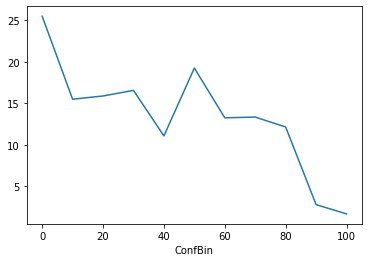

In [147]:
dHRmean = df.groupby("ConfBin")["dHR"].mean()
dHRstd = df.groupby("ConfBin")["dHR"].std()

dHRstd.plot()

<AxesSubplot:xlabel='ConfBin'>

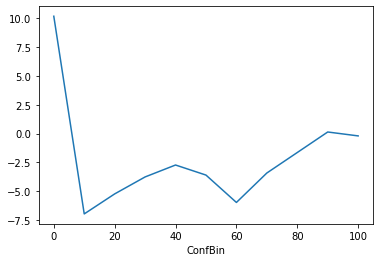

In [148]:
dHRmean.plot()